# Create the Decision Tree Classifier and Visualize it Graphically using "IRIS" Dataset

# IMPORTING THE LIBRARIES AND DATASETS

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\H P\Downloads\Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# LABEL ENCODING (Since it has only 3 species)

In [3]:
species_col = {
    "Iris-setosa" : 0,
    "Iris-versicolor" : 1,
    "Iris-virginica" : 2
}

In [4]:
df['Species'] = df['Species'].map(species_col)

In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [6]:
print(df['Species'].value_counts())

0    50
1    50
2    50
Name: Species, dtype: int64


# SPLITTING THE ATTRIBUTES AND LABELS

In [7]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [8]:
print(X[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [9]:
print(y[:10])

[0 0 0 0 0 0 0 0 0 0]


# SPLITTING TRAINING AND TESTING SETS

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# TRAINING THE TRAIN SETS USING DECISSION TREE CLASSIFIER USING GINI

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'gini')
clf = dtc.fit(X_train, y_train)
print(clf)

DecisionTreeClassifier()


# PREDICTING TEST RESULTS

In [18]:
print(dtc.predict([[5.9, 3.0, 5.1, 1.8]]))

[2]


In [19]:
y_pred = dtc.predict(X_test)
print(y_pred)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]


# CREATING A CONFUSION MATRIX TO EVALUATE THE PERFORMANCE OF THE MODEL AND ACCURACY SCORE FOR MODEL PREDICTION

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print()
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

0.9666666666666667


# VISUALIZING THE TREE PREDICTION ON GINI

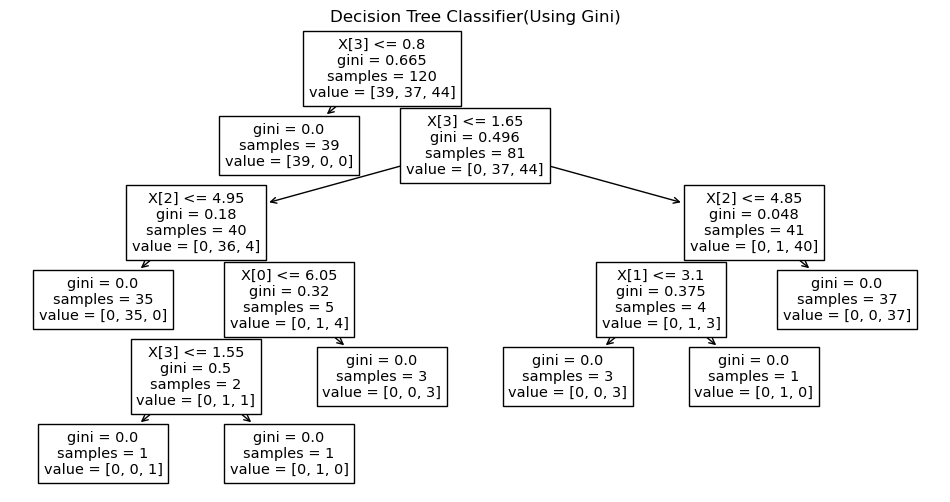

In [34]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(12, 6))
tree.plot_tree(clf)
plt.title("Decision Tree Classifier(Using Gini)")
plt.show()

Gini is a Linear Measure and the range of the Gini index is [0, 1], where 0 indicates perfect purity and 1 indicates maximum impurity. It is the probability of misclassifying a randomly chosen element in a set.

As you can see in the above graph itself that, the decision node(in which the box is divided into two different boxes excluding the Starting one)is been divided into two parts it is because the value Gini > 0. It is less robust than entropy.

# TRAINING THE TRAIN SETS USING DECISSION TREE CLASSIFIER USING ENTROPY

In [35]:
dtc_2 = DecisionTreeClassifier(criterion = 'entropy')
clf_2 = dtc_2.fit(X_train, y_train)
print(clf_2)

DecisionTreeClassifier(criterion='entropy')


# PREDICTING TEST RESULTS 

In [36]:
print(dtc.predict([[4.6, 3.4, 1.4, 0.3]]))

[0]


In [37]:
y_pred = dtc_2.predict(X_test)
print(y_pred)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]


In [38]:
cm_2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_2)
print()
a_s = accuracy_score(y_test, y_pred)
print("The Accuracy Score is\n", a_s)

Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

The Accuracy Score is
 0.9666666666666667


# VISUALIZING THE TREE PREDICTION ON ENTROPY

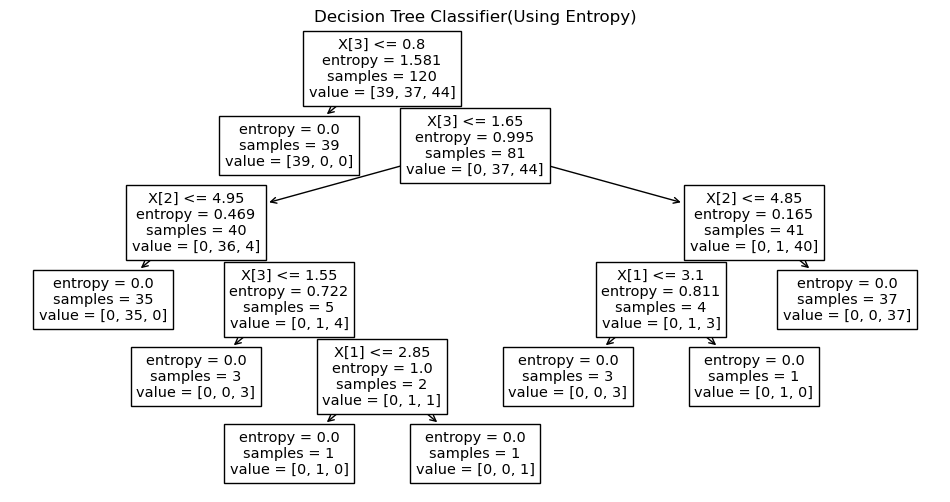

In [39]:
plt.figure(figsize=(12, 6))
tree.plot_tree(clf_2)
plt.title("Decision Tree Classifier(Using Entropy)")
plt.show()

Entropy is a logarithmic measure and The range of entropy is [0, log(c)], where c is the number of classes. It is more robust than Gini index.
 
It also lies between 0 to 1, they measures the amount of uncertainty or randomness in a set. 